<a href="https://colab.research.google.com/github/Amboyandrey/LE2_Amboy_NA/blob/main/Final_Lab_Exam_Classifications.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install ucimlrepo

**importing uci dataset**

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset from uci
glass_identification = fetch_ucirepo(id=42)

# metadata
print(glass_identification.metadata)

# variable information
print(glass_identification.variables)


{'uci_id': 42, 'name': 'Glass Identification', 'repository_url': 'https://archive.ics.uci.edu/dataset/42/glass+identification', 'data_url': 'https://archive.ics.uci.edu/static/public/42/data.csv', 'abstract': 'From USA Forensic Science Service; 6 types of glass; defined in terms of their oxide content (i.e. Na, Fe, K, etc)', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 214, 'num_features': 9, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Type_of_glass'], 'index_col': ['Id_number'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1987, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5WW2P', 'creators': ['B. German'], 'intro_paper': None, 'additional_info': {'summary': 'Vina conducted a comparison test of her rule-based system, BEAGLE, the nearest-neighbor algorithm, and discriminant analysis.  BEAGLE is a product available through VRS Consulting, In

**Get 'data_url' from the output metadata**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

glass_dataset = pd.read_csv('https://archive.ics.uci.edu/static/public/42/data.csv')

glass_dataset.head(10)

,Id_number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,7,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,8,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,9,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,10,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


check for null present in the data

In [4]:
glass_dataset.drop_duplicates()

glass_dataset.isnull().sum()*100/glass_dataset.shape[0]

Id_number        0.0
RI               0.0
Na               0.0
Mg               0.0
Al               0.0
Si               0.0
K                0.0
Ca               0.0
Ba               0.0
Fe               0.0
Type_of_glass    0.0
dtype: float64

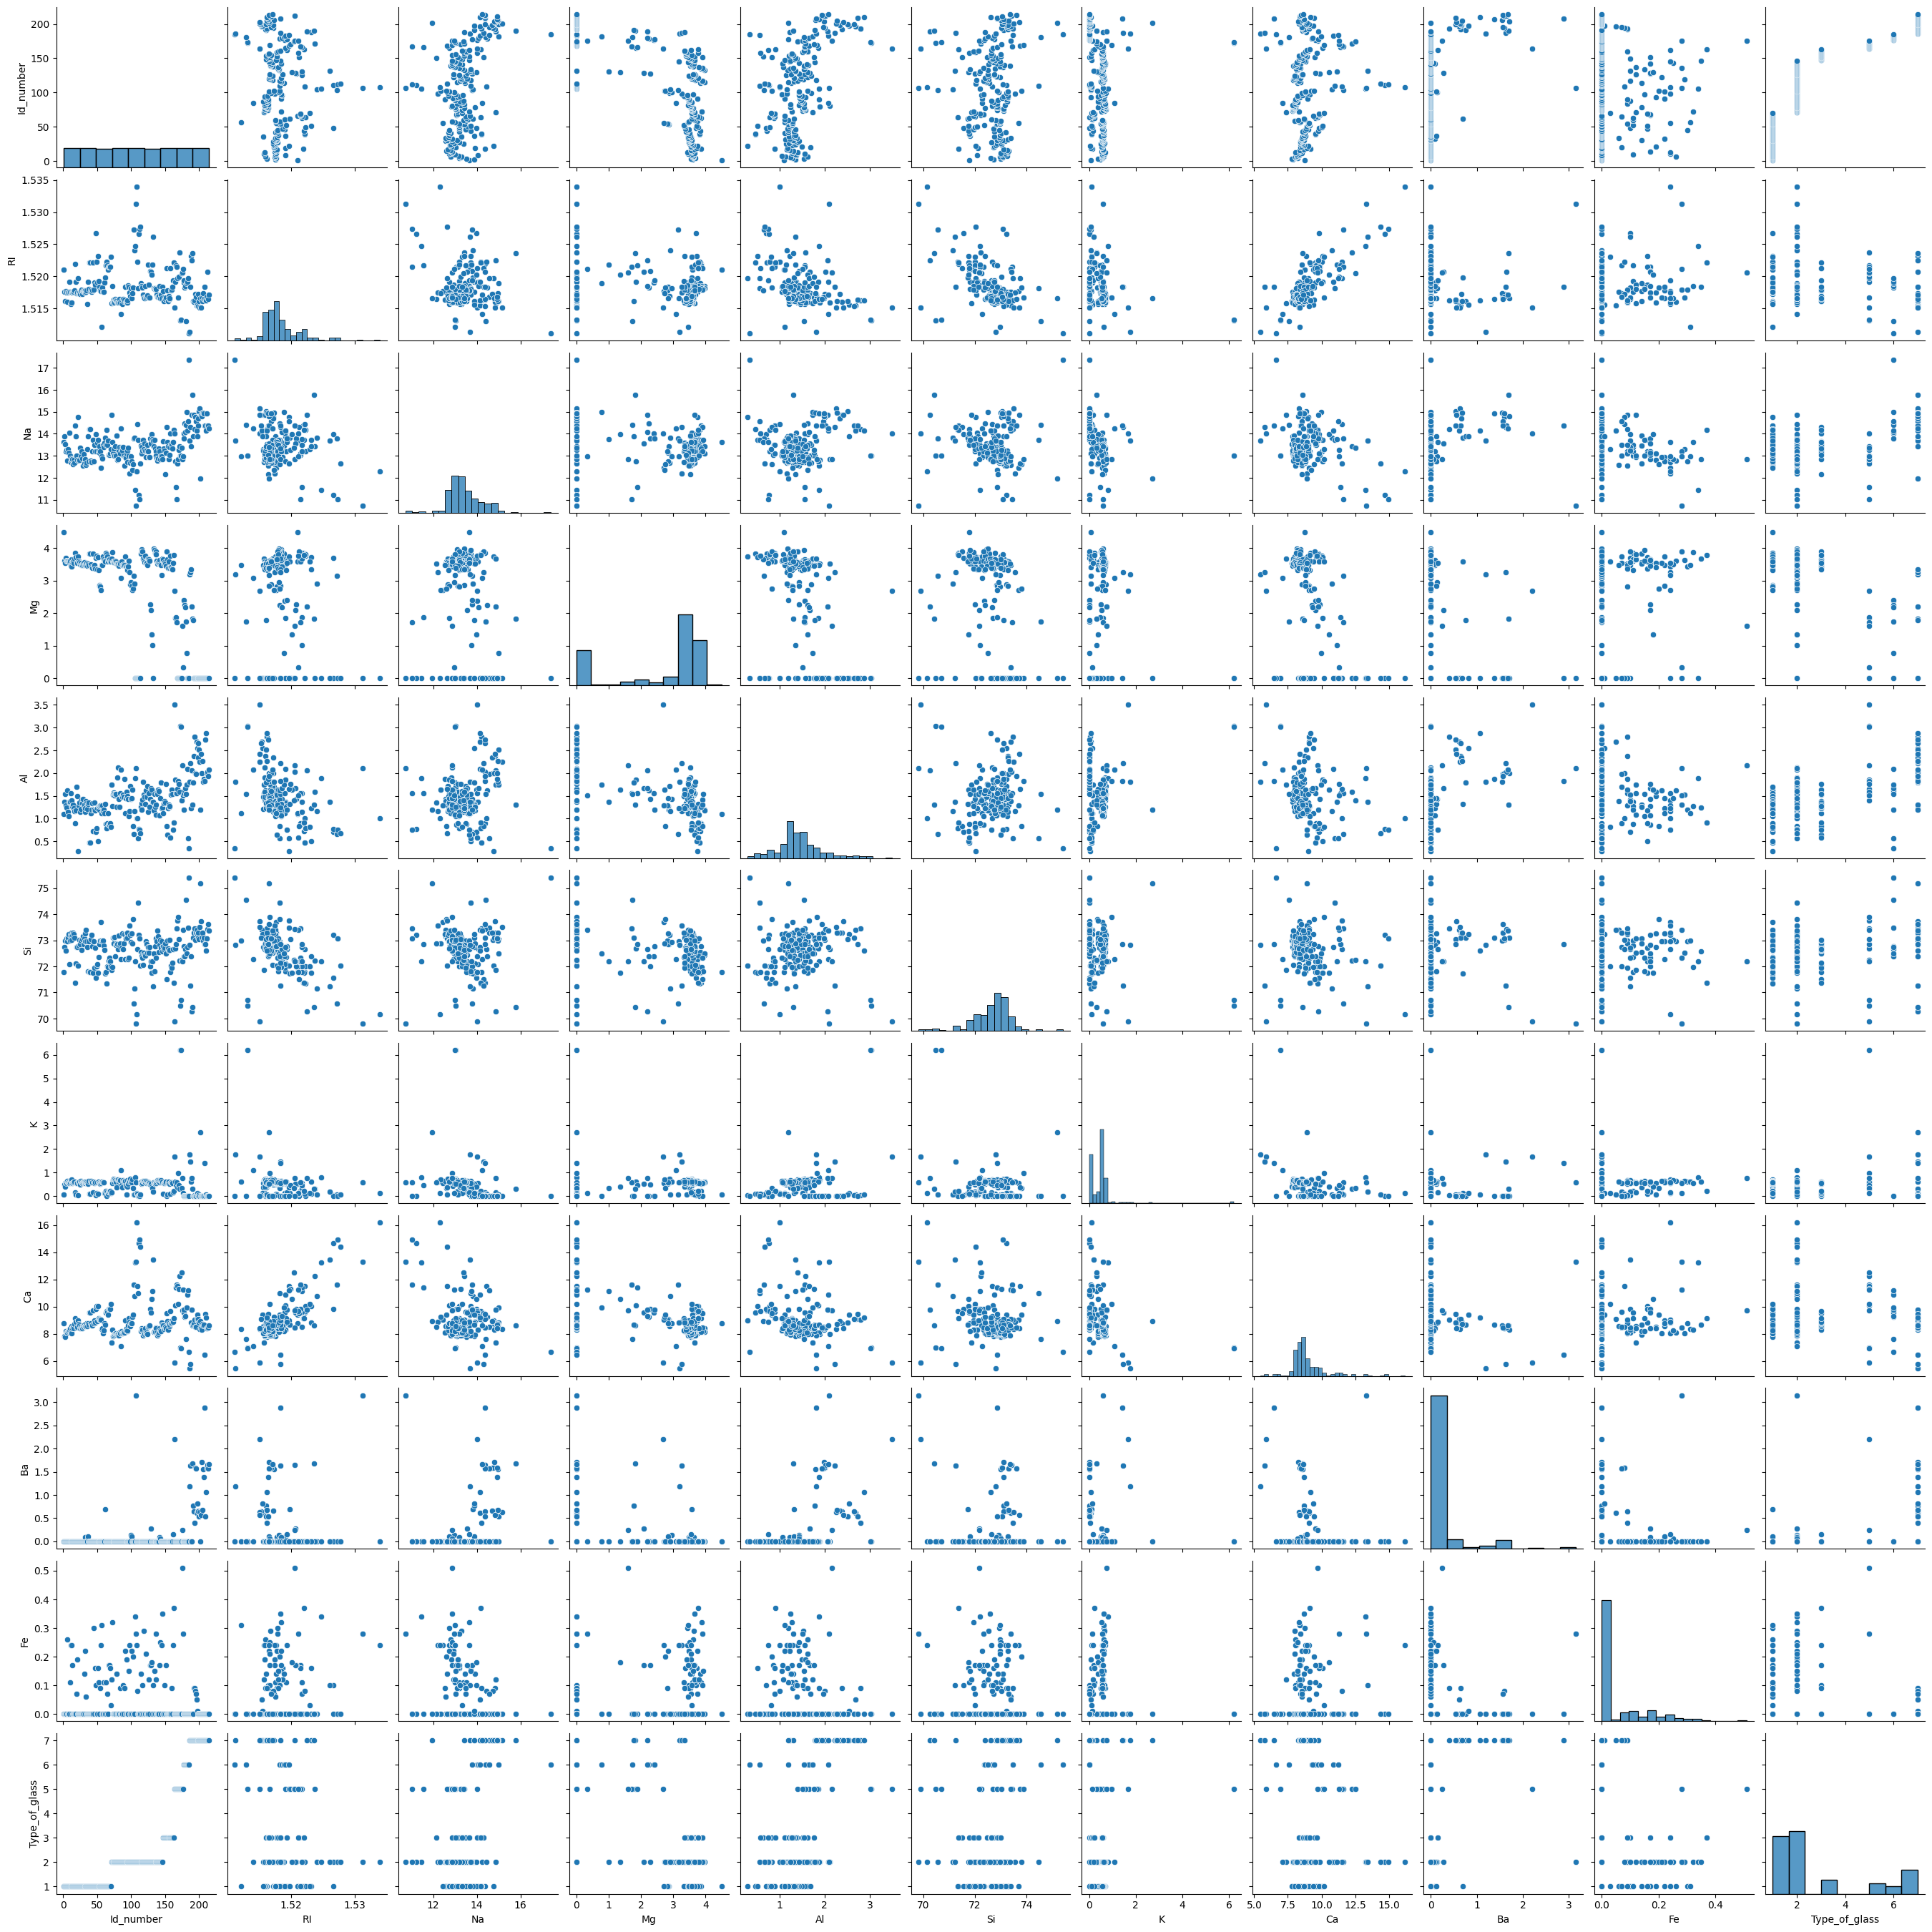

In [5]:
sns.pairplot(glass_dataset)

check for outliers in the dataset

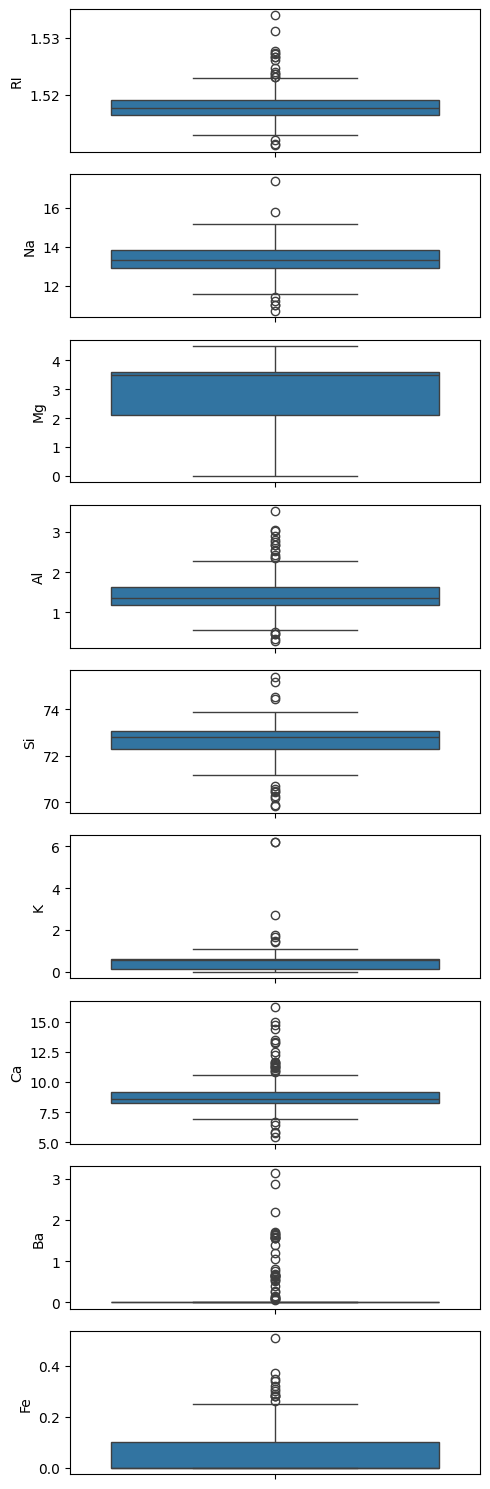

In [6]:
fig, axs = plt.subplots(9, figsize = (5,15))
plt1 = sns.boxplot(glass_dataset['RI'], ax = axs[0])
plt2 = sns.boxplot(glass_dataset['Na'], ax = axs[1])
plt3 = sns.boxplot(glass_dataset['Mg'], ax = axs[2])
plt4 = sns.boxplot(glass_dataset['Al'], ax = axs[3])
plt5 = sns.boxplot(glass_dataset['Si'], ax = axs[4])
plt6 = sns.boxplot(glass_dataset['K'], ax = axs[5])
plt7 = sns.boxplot(glass_dataset['Ca'], ax = axs[6])
plt8 = sns.boxplot(glass_dataset['Ba'], ax = axs[7])
plt9 = sns.boxplot(glass_dataset['Fe'], ax = axs[8])
plt.tight_layout()


**Pre-Processing**

Remove Outliners

In [7]:
Q1 = glass_dataset.drop(columns=['Type_of_glass']).quantile(0.25)
Q3 = glass_dataset.drop(columns=['Type_of_glass']).quantile(0.75)
IQR = Q3 - Q1
df_no_outliers = glass_dataset[~((glass_dataset.drop(columns=['Type_of_glass']) < (Q1 - 1.5 * IQR)) | (glass_dataset.drop(columns=['Type_of_glass']) > (Q3 + 1.5 * IQR))).any(axis=1)]


In [8]:

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(X, thresh=5.0):
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix) for ix in range(X.iloc[:, variables].shape[1])]
        max_vif = max(vif)
        if max_vif > thresh:
            maxloc = vif.index(max_vif)
            print(f"Dropping {X.iloc[:, variables].columns[maxloc]} with VIF={max_vif}")
            del variables[maxloc]
            dropped = True
    print(f'Remaining variables: {X.columns[variables]}')
    return X.iloc[:, variables]

X_no_multicollinearity = calculate_vif(df_no_outliers.drop(columns=['Type_of_glass']))

y_no_outliers_multicollinearity = df_no_outliers['Type_of_glass']
X_no_outliers_multicollinearity = df_no_outliers.drop(columns=['Type_of_glass'])

Dropping RI with VIF=802823.098204191
Dropping Si with VIF=2259.238468317384
Dropping Na with VIF=550.1749004812199
Dropping Ca with VIF=45.027290858147964
Dropping Al with VIF=24.09329301789004
Dropping Mg with VIF=7.403124494704282
Remaining variables: Index(['Id_number', 'K', 'Ba', 'Fe'], dtype='object')


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Drop "ID_number" column and then assign X and y variables

In [9]:
glass_dataset.drop(columns=["Id_number"], inplace=True)

X = glass_dataset.drop(columns=["Type_of_glass"])
y = glass_dataset["Type_of_glass"]

print(X, y)
X.head()
X.describe()
y.head()
y.describe()

          RI     Na    Mg    Al     Si     K    Ca    Ba   Fe
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0
..       ...    ...   ...   ...    ...   ...   ...   ...  ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0

[214 rows x 9 columns] 0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type_of_glass, Length: 214, dtype: int64


count    214.000000
mean       2.780374
std        2.103739
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        7.000000
Name: Type_of_glass, dtype: float64

Perform 80/20 Data split

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 100)

In [11]:
from sklearn.preprocessing import StandardScaler, label_binarize

Standardize the features

In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Binarize the output

In [42]:
y_train_bin = label_binarize(y_train, classes=[1, 2, 3, 5, 6, 7])
y_test_bin = label_binarize(y_test, classes=[1, 2, 3, 5, 6, 7])
n_classes = y_train_bin.shape[1]

**Initialized decision Tree Classifier**

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

decision_tree_model = DecisionTreeClassifier(random_state=41)
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=41)

In [38]:
y_pred_dt = decision_tree_model.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f'Decision Tree Accuracy: {accuracy_dt:.4f}')

Decision Tree Accuracy: 0.7907


Predict probabilities for decision tree

In [39]:
y_score_dt = decision_tree_model.predict_proba(X_test)

Display decision tree model confusion matrix

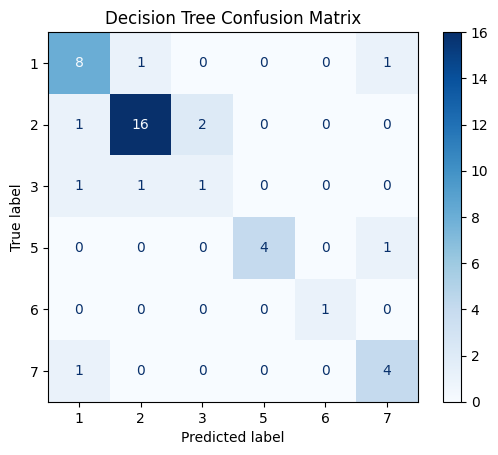

In [43]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_dt, labels=[1, 2, 3, 5, 6, 7])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[1, 2, 3, 5, 6, 7])

disp.plot(cmap=plt.cm.Blues)
plt.title('Decision Tree Confusion Matrix')
plt.show()


**Compute ROC curve and AUC score for each class**

In [18]:
from sklearn.metrics import roc_auc_score, roc_curve

fpr_dt = dict()
tpr_dt = dict()
roc_auc_dt = dict()
for i in range(n_classes):
    fpr_dt[i], tpr_dt[i], _ = roc_curve(y_test_bin[:, i], y_score_dt[:, i])
    roc_auc_dt[i] = roc_auc_score(y_test_bin[:, i], y_score_dt[:, i])

Plot ROC curve

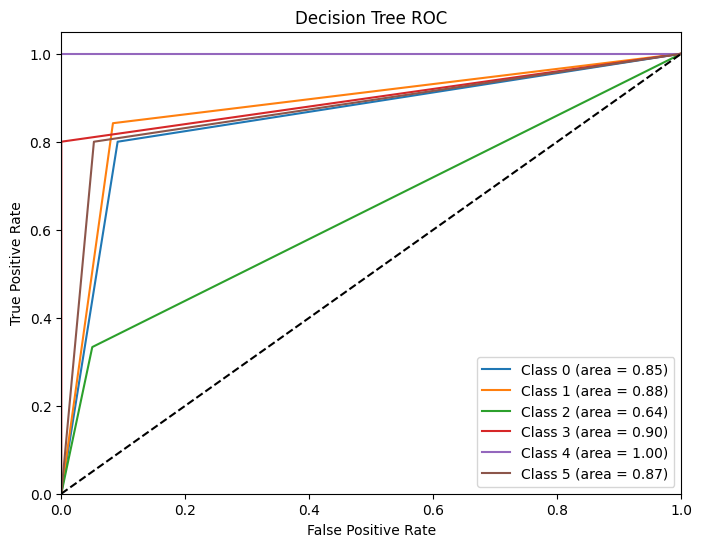

Decision Tree AUC score: {0: 0.8545454545454545, 1: 0.8793859649122806, 2: 0.6416666666666666, 3: 0.9, 4: 1.0, 5: 0.8736842105263158}


In [35]:
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr_dt[i], tpr_dt[i], label=f'Class {i} (area = {roc_auc_dt[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC')
plt.legend(loc="lower right")
plt.show()

print(f'Decision Tree AUC score: {roc_auc_dt}')

**Initialized random forest model**

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

random_forest_model = RandomForestClassifier(n_estimators=100, random_state=41)
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(random_state=41)

In [21]:
y_pred_rf = random_forest_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf}')

Random Forest Accuracy: 0.8837209302325582


Predict probabilities for random forest

In [22]:
y_score_rf = random_forest_model.predict_proba(X_test)

Display random forest model confusion matrix

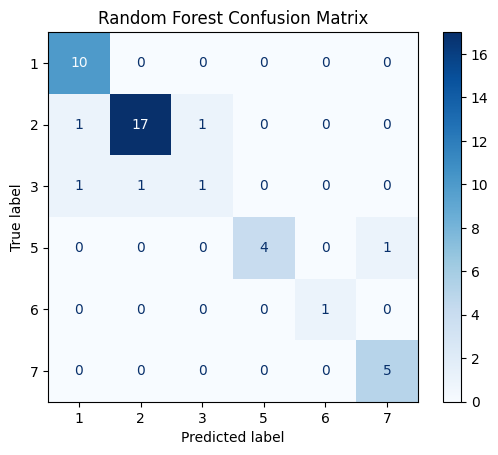

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_rf, labels=[1, 2, 3, 5, 6, 7])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[1, 2, 3, 5, 6, 7])

disp.plot(cmap=plt.cm.Blues)
plt.title('Random Forest Confusion Matrix')
plt.show()


**Compute ROC curve and AUC score for each class**

In [24]:
from sklearn.metrics import roc_auc_score, roc_curve

fpr_rf = dict()
tpr_rf = dict()
roc_auc_rf = dict()
for i in range(n_classes):
    fpr_rf[i], tpr_rf[i], _ = roc_curve(y_test_bin[:, i], y_score_rf[:, i])
    roc_auc_rf[i] = roc_auc_score(y_test_bin[:, i], y_score_rf[:, i])

Plot ROC curve

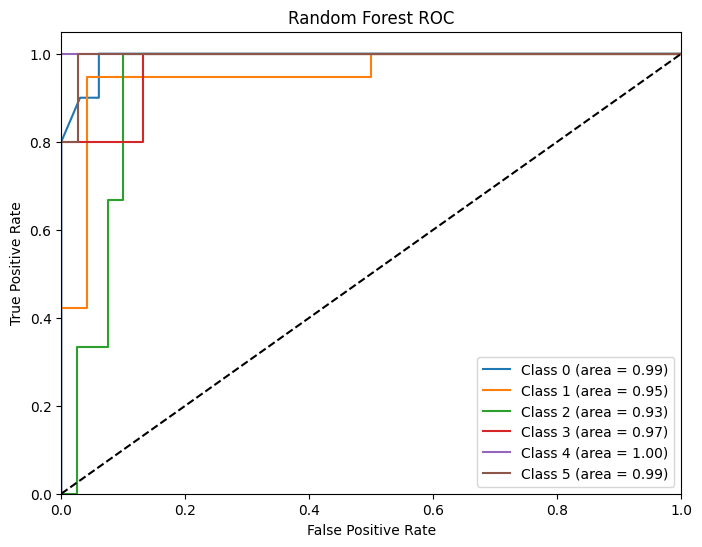

Random Forest AUC score: {0: 0.9924242424242424, 1: 0.9517543859649122, 2: 0.9333333333333333, 3: 0.9736842105263158, 4: 1.0, 5: 0.9947368421052631}


In [25]:
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr_rf[i], tpr_rf[i], label=f'Class {i} (area = {roc_auc_rf[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC')
plt.legend(loc="lower right")
plt.show()

print(f'Random Forest AUC score: {roc_auc_rf}')

**export the models**

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [27]:
import pickle

pickle.dump(decision_tree_model, open('/content/decision_tree_model','wb'))
pickle.dump(random_forest_model, open('/content/random_forest_model','wb'))

In [28]:
model_loaded1 = pickle.load(open('/content/decision_tree_model', 'rb'))
model_loaded2 = pickle.load(open('/content/random_forest_model', 'rb'))

In [29]:
model_loaded1.predict_proba(X_test)

array([[0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0.

In [30]:
model_loaded2.predict_proba(X_test)

array([[0.07, 0.79, 0.08, 0.  , 0.  , 0.06],
       [0.01, 0.22, 0.02, 0.06, 0.  , 0.69],
       [0.37, 0.55, 0.06, 0.01, 0.  , 0.01],
       [0.44, 0.53, 0.03, 0.  , 0.  , 0.  ],
       [0.11, 0.56, 0.01, 0.22, 0.09, 0.01],
       [0.05, 0.95, 0.  , 0.  , 0.  , 0.  ],
       [0.3 , 0.12, 0.58, 0.  , 0.  , 0.  ],
       [0.75, 0.02, 0.2 , 0.01, 0.  , 0.02],
       [0.  , 0.05, 0.  , 0.08, 0.77, 0.1 ],
       [0.06, 0.48, 0.03, 0.12, 0.28, 0.03],
       [0.08, 0.92, 0.  , 0.  , 0.  , 0.  ],
       [0.04, 0.21, 0.03, 0.68, 0.03, 0.01],
       [0.  , 0.02, 0.  , 0.01, 0.1 , 0.87],
       [0.02, 0.98, 0.  , 0.  , 0.  , 0.  ],
       [0.02, 0.97, 0.01, 0.  , 0.  , 0.  ],
       [0.49, 0.34, 0.11, 0.  , 0.  , 0.06],
       [0.11, 0.14, 0.01, 0.7 , 0.04, 0.  ],
       [0.93, 0.02, 0.03, 0.  , 0.  , 0.02],
       [0.81, 0.07, 0.06, 0.  , 0.01, 0.05],
       [0.26, 0.42, 0.21, 0.  , 0.09, 0.02],
       [0.02, 0.33, 0.  , 0.48, 0.03, 0.14],
       [0.2 , 0.2 , 0.02, 0.02, 0.11, 0.45],
       [0.

In [44]:
y_pred_dt = model_loaded1.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f'Decision Tree Accuracy: {accuracy_dt}')

Decision Tree Accuracy: 0.7906976744186046


In [45]:
y_pred_rf = model_loaded2.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf}')

Random Forest Accuracy: 0.8837209302325582


**Display Classification Report for both Model**

In [33]:
from sklearn.metrics import classification_report

print("Decision Tree")
print(classification_report(y_test,y_pred_dt, zero_division=1))
print("Random Forest")
print(classification_report(y_test,y_pred_rf, zero_division=1))

Decision Tree
              precision    recall  f1-score   support

           1       0.73      0.80      0.76        10
           2       0.89      0.84      0.86        19
           3       0.33      0.33      0.33         3
           5       1.00      0.80      0.89         5
           6       1.00      1.00      1.00         1
           7       0.67      0.80      0.73         5

    accuracy                           0.79        43
   macro avg       0.77      0.76      0.76        43
weighted avg       0.80      0.79      0.79        43

Random Forest
              precision    recall  f1-score   support

           1       0.83      1.00      0.91        10
           2       0.94      0.89      0.92        19
           3       0.50      0.33      0.40         3
           5       1.00      0.80      0.89         5
           6       1.00      1.00      1.00         1
           7       0.83      1.00      0.91         5

    accuracy                           0.88      

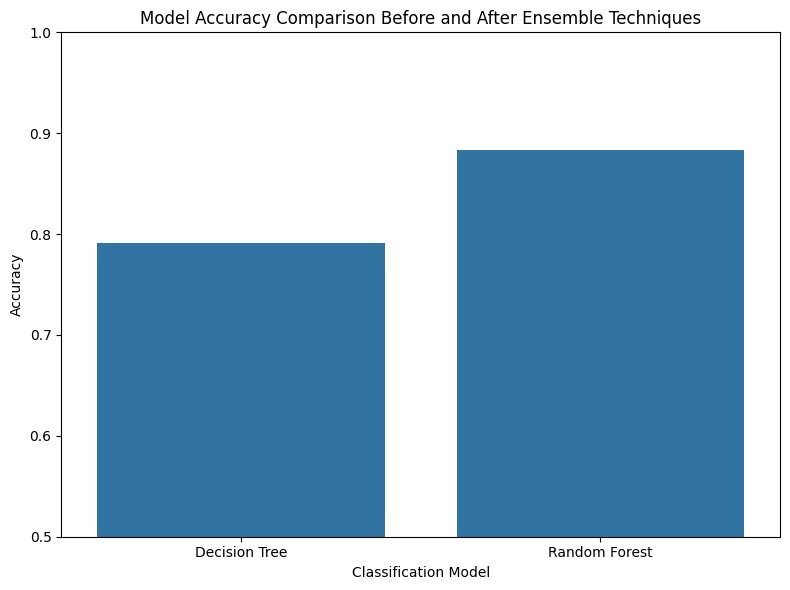

Summary of Model Accuracies:
Decision Tree: 0.7907
Random Forest: 0.8837


In [34]:
models_accuracy = {
    "Decision Tree": accuracy_dt,
    "Random Forest": accuracy_rf
    }

plt.figure(figsize=(8, 6))
sns.barplot(x=list(models_accuracy.keys()), y=list(models_accuracy.values()))
plt.xlabel('Classification Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison Before and After Ensemble Techniques')
plt.ylim(0.5, 1.0)
plt.tight_layout()
plt.show()

print("Summary of Model Accuracies:")
for model, accuracy in models_accuracy.items():
    print(f"{model}: {accuracy:.4f}")